# Fundamentals of Social Data Science 
## Week 2 Day 2 Lab: Exploring Time Series Data

Today we will make use of the `wiki-time-plots.py` script. This has been pushed now to the oii-fsds-wikipedia repository. You should be able to fetch it to your repo the same way that you fetched the files for the previous lab. 

With your downloaded DataFrames, use these scripts in order to view the edit history over time. By default this script will simply view a count of edit history. It will need further processing if you wish to choose another column. For your presentation on Monday, please consider what word, phrase, or feature of the revisions you wish to show over time. You will also need to consider how you can plot two distributions. The moving average code will plot the revisions and the moving average. You can use this to help understand how to plot to separate revisions. 

You are welcome to use AI tools in order to assist you in drafting this code. However, your group will be responsible for the code regardless of its provenance. "A poor worker blames their tools". 

Draw upon your group's potential expertise in social science to come up with a theoretically informed rationale for a given comparison. 


Some steps to consider with your code:
- Create a new function that extracts a feature. 
- Plot that feature in a similar way as the raw count moving average.
- Understand how to use this code either in Jupyter (i.e. VS Code) or as a script. 
- I will demonstrate the use of `%autoreload` in class. 

You can use the script below if you wish in order to run the commands directly within a Jupyter notebook rather than via that terminal. 

In [1]:
# Load the extension
%load_ext autoreload
%autoreload 2

# Import the module
import wiki_time_plots as wtp


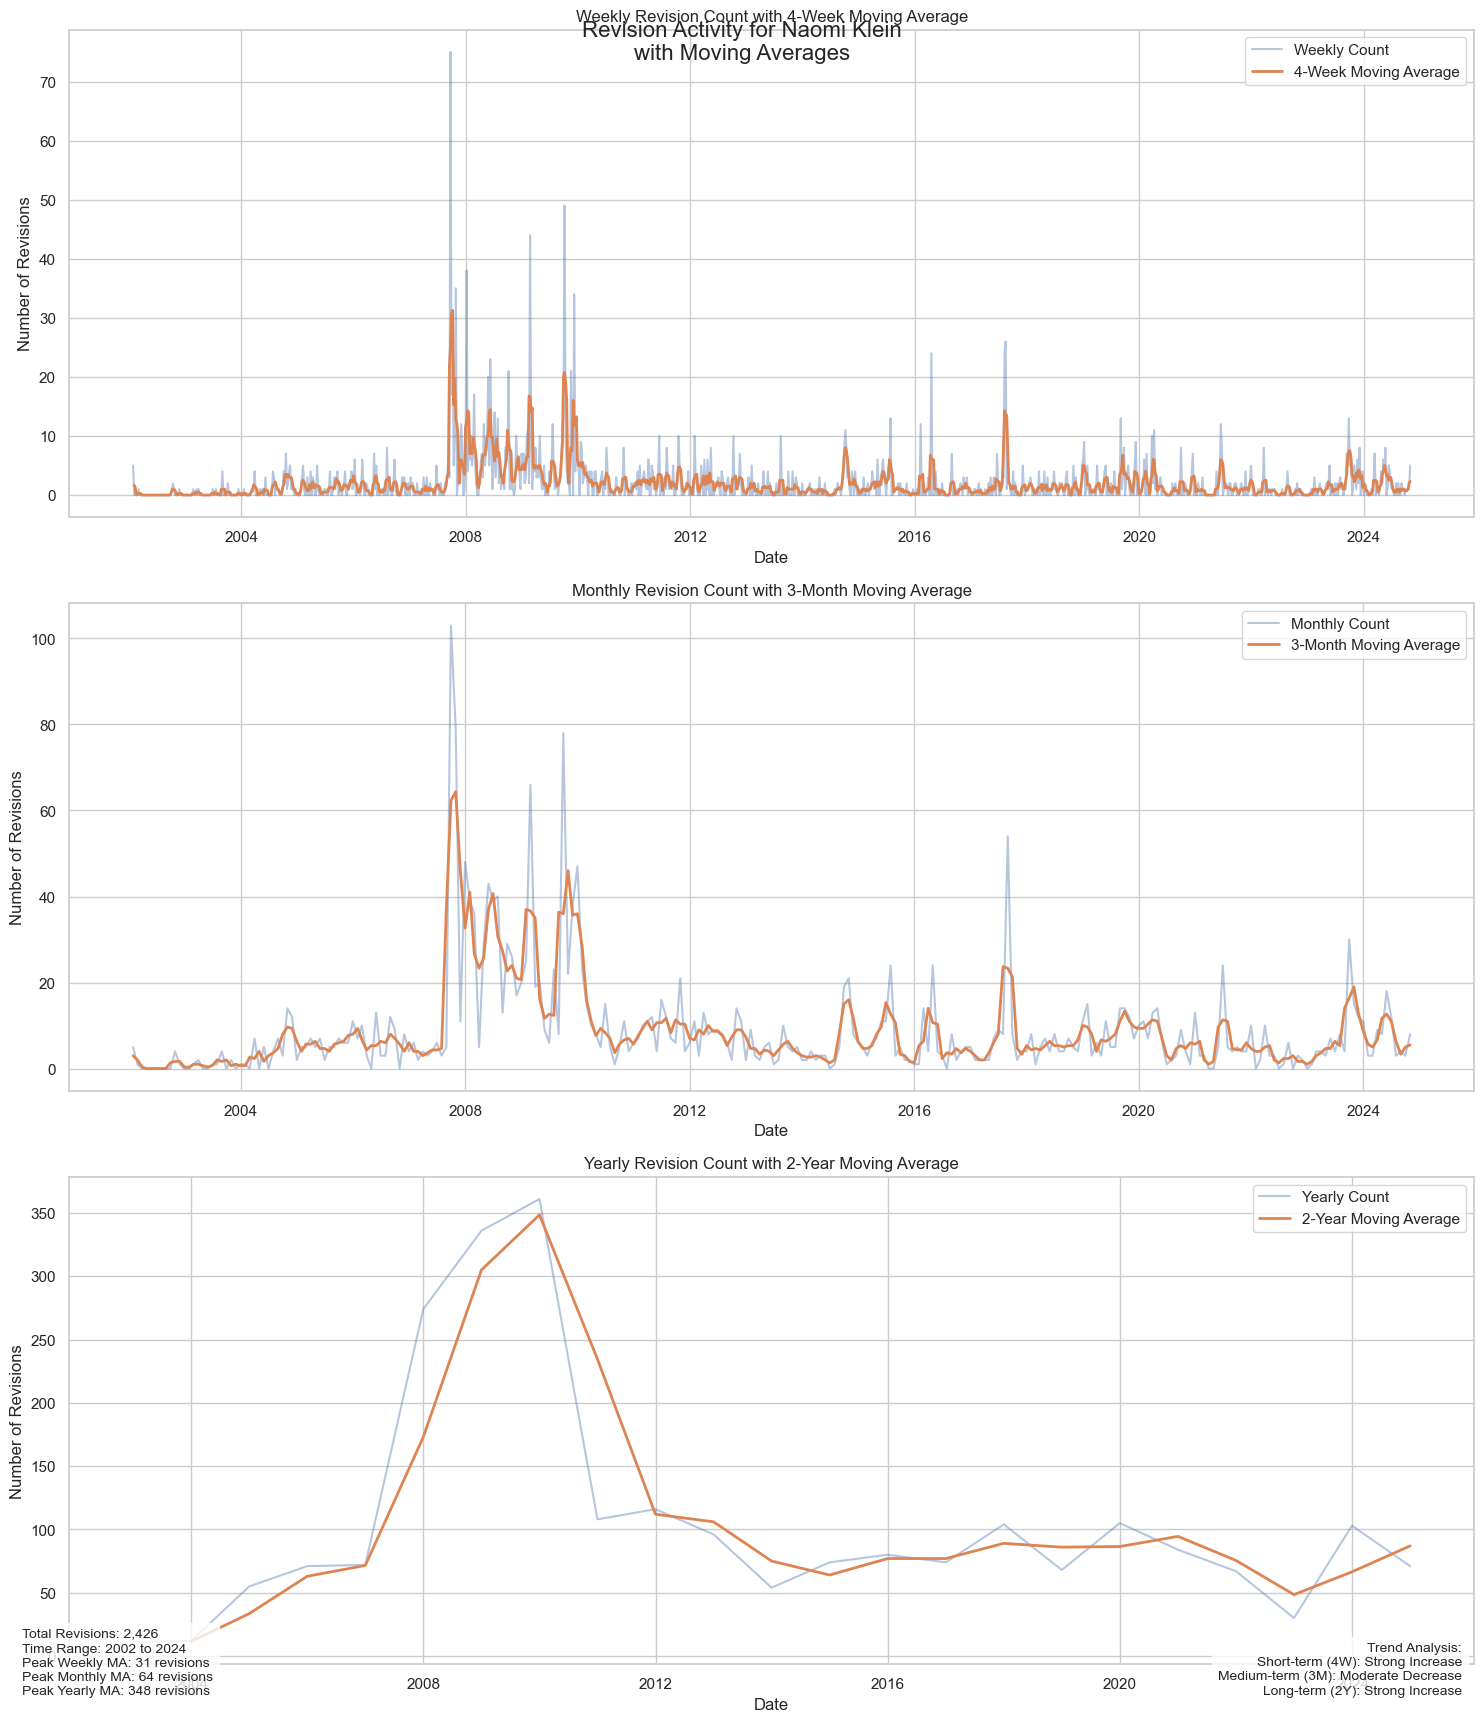

In [13]:
# Load some data
df = wtp.load_wiki_data('DataFrames/Naomi Klein.feather')

# You can also modify the style if needed
wtp.set_plot_style()  # Apply the custom style to all subsequent plots

# Create a basic plot
# fig = wtp.plot_revision_counts(
#     df=df,
#     article_name="Data",
#     moving_average=False
# )

# Create a plot with moving averages
fig_ma = wtp.plot_revision_counts(
    df=df,
    article_name="Naomi Klein",
    moving_average=True
)

# If you want to use specific functions directly
# fig_raw = wtp.create_time_series_plots_raw(
#     df=df,
#     article_name="Data"
# )


In [14]:
from collections import Counter
import re

df.info()

all_comments = ' '.join(df['comment'].astype(str).str.lower())

# Extract words and count frequencies
words = re.findall(r'\b\w+\b', all_comments)  # Tokenize words
word_freq = Counter(words)  # Count frequencies
sorted_word_freq = word_freq.most_common()  # Sort by frequency

# Display the sorted word frequency
sorted_word_freq

<class 'pandas.core.frame.DataFrame'>
Index: 2426 entries, 197 to 2357
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   revision_id  2426 non-null   object             
 1   timestamp    2426 non-null   datetime64[ns, UTC]
 2   username     1742 non-null   object             
 3   userid       1742 non-null   object             
 4   comment      1939 non-null   object             
 5   text_length  2426 non-null   int64              
 6   year         2426 non-null   object             
 7   month        2426 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(6)
memory usage: 170.6+ KB


[('none', 490),
 ('talk', 470),
 ('by', 445),
 ('the', 423),
 ('wp', 398),
 ('to', 362),
 ('user', 303),
 ('special', 294),
 ('contributions', 275),
 ('of', 239),
 ('a', 180),
 ('revision', 170),
 ('and', 165),
 ('in', 164),
 ('172', 161),
 ('reverted', 151),
 ('tw', 146),
 ('is', 141),
 ('criticism', 139),
 ('link', 129),
 ('s', 128),
 ('undid', 125),
 ('category', 115),
 ('not', 113),
 ('edits', 111),
 ('added', 106),
 ('for', 105),
 ('shock', 103),
 ('links', 102),
 ('this', 102),
 ('using', 95),
 ('doctrine', 95),
 ('last', 90),
 ('awb', 89),
 ('version', 86),
 ('external', 79),
 ('it', 79),
 ('on', 73),
 ('family', 73),
 ('early', 72),
 ('1', 70),
 ('that', 70),
 ('klein', 69),
 ('undo', 67),
 ('fix', 64),
 ('no', 63),
 ('removed', 60),
 ('life', 60),
 ('article', 59),
 ('other', 59),
 ('edit', 58),
 ('per', 56),
 ('from', 55),
 ('as', 54),
 ('add', 53),
 ('activities', 53),
 ('more', 51),
 ('i', 50),
 ('t', 48),
 ('section', 48),
 ('99', 48),
 ('book', 47),
 ('project', 46),
 ('w

In [7]:
from textblob import TextBlob

df['sentiment'] = df['comment'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_label'] = df['sentiment'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))

df[['comment', 'sentiment', 'sentiment_label']]

,comment,sentiment,sentiment_label
197,None,0.0,neutral
196,/* Environmentalism */,0.0,neutral
201,None,0.0,neutral
202,None,0.0,neutral
199,Parents,0.0,neutral
...,...,...,...
2356,two one-sentence paras,0.0,neutral
2358,linked manifesto,0.0,neutral
2354,Added activist,0.0,neutral
2355,"'female writer' - no, she's a 'Canadian journa...",0.0,neutral


In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# 使用 VADER 进行情感分析
df['sentiment_2'] = df['comment'].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment_label_2'] = df['sentiment'].apply(lambda score: 'positive' if score > 0.05 else ('negative' if score < -0.05 else 'neutral'))

df[['comment', 'sentiment_2', 'sentiment_label_2']]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/chris/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,comment,sentiment_2,sentiment_label_2
197,None,0.000,neutral
196,/* Environmentalism */,0.000,neutral
201,None,0.000,neutral
202,None,0.000,neutral
199,Parents,0.000,neutral
...,...,...,...
2356,two one-sentence paras,0.000,neutral
2358,linked manifesto,0.000,neutral
2354,Added activist,0.000,neutral
2355,"'female writer' - no, she's a 'Canadian journa...",-0.296,neutral


In [15]:
df_2 = wtp.load_wiki_data('DataFrames/Naomi Klein.feather')

all_comments_2 = ' '.join(df_2['comment'].astype(str).str.lower())

# Extract words and count frequencies
words_2 = re.findall(r'\b\w+\b', all_comments_2)  # Tokenize words
word_freq_2 = Counter(words_2)  # Count frequencies
sorted_word_freq_2 = word_freq_2.most_common()  # Sort by frequency

# Display the sorted word frequency
sorted_word_freq_2

<class 'pandas.core.frame.DataFrame'>
Index: 2426 entries, 197 to 2357
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   revision_id  2426 non-null   object             
 1   timestamp    2426 non-null   datetime64[ns, UTC]
 2   username     1742 non-null   object             
 3   userid       1742 non-null   object             
 4   comment      1939 non-null   object             
 5   text_length  2426 non-null   int64              
 6   year         2426 non-null   object             
 7   month        2426 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(6)
memory usage: 170.6+ KB


[('none', 490),
 ('talk', 470),
 ('by', 445),
 ('the', 423),
 ('wp', 398),
 ('to', 362),
 ('user', 303),
 ('special', 294),
 ('contributions', 275),
 ('of', 239),
 ('a', 180),
 ('revision', 170),
 ('and', 165),
 ('in', 164),
 ('172', 161),
 ('reverted', 151),
 ('tw', 146),
 ('is', 141),
 ('criticism', 139),
 ('link', 129),
 ('s', 128),
 ('undid', 125),
 ('category', 115),
 ('not', 113),
 ('edits', 111),
 ('added', 106),
 ('for', 105),
 ('shock', 103),
 ('links', 102),
 ('this', 102),
 ('using', 95),
 ('doctrine', 95),
 ('last', 90),
 ('awb', 89),
 ('version', 86),
 ('external', 79),
 ('it', 79),
 ('on', 73),
 ('family', 73),
 ('early', 72),
 ('1', 70),
 ('that', 70),
 ('klein', 69),
 ('undo', 67),
 ('fix', 64),
 ('no', 63),
 ('removed', 60),
 ('life', 60),
 ('article', 59),
 ('other', 59),
 ('edit', 58),
 ('per', 56),
 ('from', 55),
 ('as', 54),
 ('add', 53),
 ('activities', 53),
 ('more', 51),
 ('i', 50),
 ('t', 48),
 ('section', 48),
 ('99', 48),
 ('book', 47),
 ('project', 46),
 ('w